<a href="https://colab.research.google.com/github/yivancha/Python-for-Data-Analytics/blob/main/Restaurant_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Pandas Practical Tasks

/content/drive/MyDrive/Pandas Practical Tasks


In [ ]:
import sqlite3
import csv
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get the absolute path to the current working directory in Google Colab
current_dir = os.getcwd()

# Define the database path relative to the current working directory
db_path = os.path.join('/content/drive/MyDrive/Pandas Practical Tasks', 'db.sqlite3')

output_file = 'restaurant_data.csv'

# Підключення до бази даних
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

query1 = "SELECT * FROM restaurant_product;"
query2 = "SELECT * FROM restaurant_orderitem;"
query3 = "SELECT * FROM restaurant_order;"


df1 = pd.read_sql_query(query1, conn)
df2 = pd.read_sql_query(query2, conn)
df3 = pd.read_sql_query(query3, conn)

print(df1.columns)
print(df2.columns)
print(df3.columns)

# Закриття підключення до бази даних
cursor.close()
conn.close()

Index(['id', 'price', 'name'], dtype='object')
Index(['id', 'quantity', 'order_id', 'product_id'], dtype='object')
Index(['id', 'datetime'], dtype='object')


In [ ]:
# Об'єднуємо дані в один DataFrame

# df2 (orderitem) має зовнішній ключ до product ('product_id')
combined_df = pd.merge(df2, df1, left_on='product_id', right_on='id', how='left')

# df2 (orderitem) також має зовнішній ключ до order ('order_id')
combined_df = pd.merge(combined_df, df3, left_on='order_id', right_on='id', how='left')

# Зберігаємо в CSV
combined_df.to_csv('restaurant_data.csv', index=False)

# Переглядаємо результат
print(combined_df.head())
combined_df.info()

   id_x  quantity  order_id  product_id  id_y  price                 name  id  \
0     1         2         1           6     6   0.80        Plain Papadum   1   
1     2         1         1         240   240  12.95     King Prawn Balti   1   
2     3         1         1          19    19   2.95          Garlic Naan   1   
3     4         1         1          36    36   3.95        Mushroom Rice   1   
4     5         1         1         111   111   8.95  Paneer Tikka Masala   1   

              datetime  
0  2019-08-03 20:25:00  
1  2019-08-03 20:25:00  
2  2019-08-03 20:25:00  
3  2019-08-03 20:25:00  
4  2019-08-03 20:25:00  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_x        74818 non-null  int64  
 1   quantity    74818 non-null  int64  
 2   order_id    74818 non-null  int64  
 3   product_id  74818 non-null  int64  
 4   id_y

                         name  quantity
0                  Aloo Chaat       316
1                   Aloo Gobi       620
2                  Aloo Methi        44
3          Baingan Hari Mirch       199
4         Bengal Fish Biryani        45
..                        ...       ...
243  Vindaloo - Chicken Tikka        17
244     Vindaloo - King Prawn        23
245           Vindaloo - Lamb        55
246          Vindaloo - Prawn        10
247            Vindaloo Sauce        93

[248 rows x 2 columns]
                     name  quantity
188         Plain Papadum     10648
186            Pilau Rice      6367
187            Plain Naan      4983
81            Garlic Naan      3318
189            Plain Rice      2964
165          Onion Bhajee      2749
144         Mango Chutney      2504
52   Chicken Tikka Masala      2473
26                Chapati      1935
153            Mint Sauce      1840


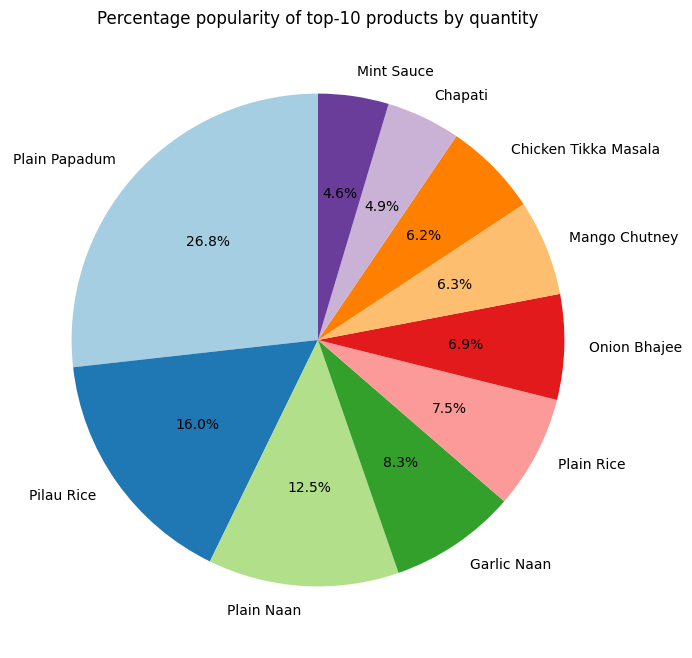

In [ ]:
#2. Топ-10 найпопулярніших продуктів за кількістю.
product_sales = combined_df.groupby('name')['quantity'].sum().reset_index()
print(product_sales)

top_10_by_quantity = product_sales.nlargest(10, 'quantity')
print(top_10_by_quantity)

plt.figure(figsize=(8, 8))
plt.pie(
    top_10_by_quantity['quantity'],
    labels=top_10_by_quantity['name'],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired(range(len(top_10_by_quantity)))
)
plt.title('Percentage popularity of top-10 products by quantity')
plt.show()

                         name  item_price
0                  Aloo Chaat     1564.20
1                   Aloo Gobi     3689.00
2                  Aloo Methi      261.80
3          Baingan Hari Mirch     1184.05
4         Bengal Fish Biryani      582.75
..                        ...         ...
243  Vindaloo - Chicken Tikka      135.15
244     Vindaloo - King Prawn      274.85
245           Vindaloo - Lamb      437.25
246          Vindaloo - Prawn       89.50
247            Vindaloo Sauce      367.35

[248 rows x 2 columns]
                     name  item_price
52   Chicken Tikka Masala    22133.35
186            Pilau Rice    18782.65
187            Plain Naan    12955.80
97                  Korma    12261.50
16            Bombay Aloo    10894.45
165          Onion Bhajee    10858.55
20         Butter Chicken    10626.60
81            Garlic Naan     9788.10
98        Korma - Chicken     9764.45
189            Plain Rice     8743.80


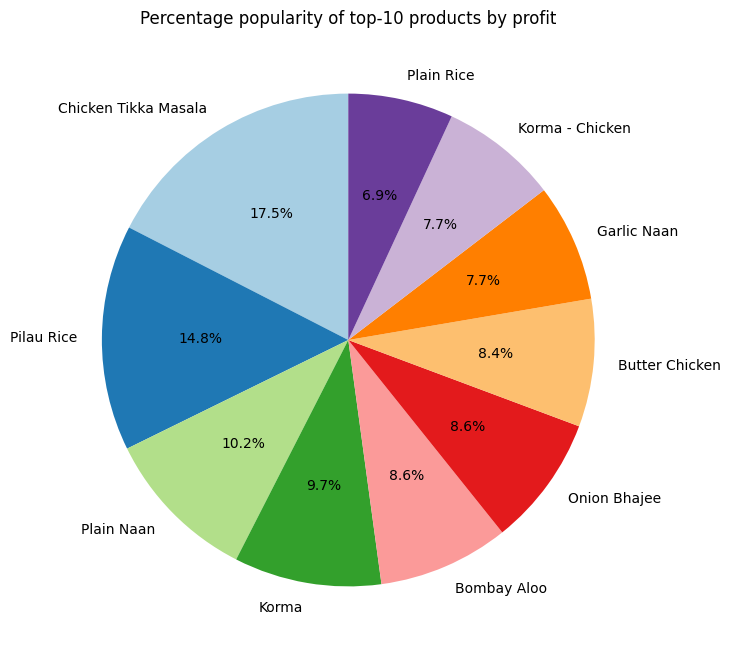

In [ ]:
#3. Топ-10 найприбутковіших продуктів за ціною одиниці.
combined_df['item_price'] = combined_df['price'] * combined_df['quantity']

product_sales = combined_df.groupby('name')['item_price'].sum().reset_index()
print(product_sales)

top_10_by_profit = product_sales.nlargest(10, 'item_price')
print(top_10_by_profit)

plt.figure(figsize=(8, 8))
plt.pie(
    top_10_by_profit['item_price'],
    labels=top_10_by_profit['name'],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired(range(len(top_10_by_profit)))
)
plt.title('Percentage popularity of top-10 products by profit')
plt.show()

hour
0        177.95
1         54.65
2        199.25
3          8.90
4         63.45
5         57.40
6        121.60
8        447.70
9        570.60
10      1250.35
11      3807.05
12     10565.85
13      8282.65
14      3343.55
15      3781.70
16     15634.75
17     72110.20
18    132462.50
19    109045.05
20     50218.25
21     21480.30
22     11001.50
23       373.25
Name: item_price, dtype: float64


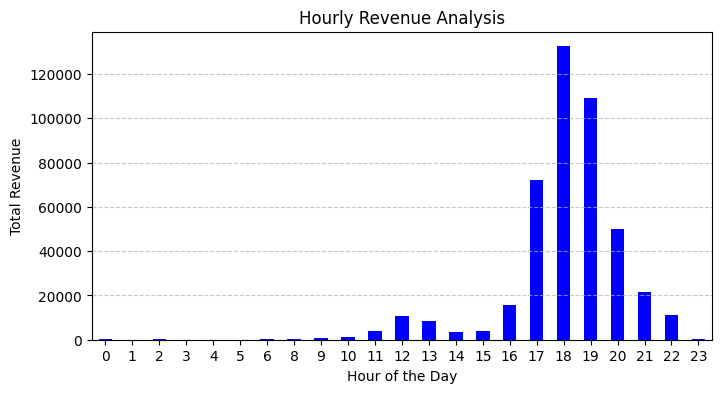

In [ ]:
#4. Аналіз доходу за годинами.
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'])
combined_df['hour'] = combined_df['datetime'].dt.hour

hourly_revenue = combined_df.groupby('hour')['item_price'].sum()
print(hourly_revenue)

plt.figure(figsize=(8, 4))
hourly_revenue.plot(kind='bar', color='blue')
plt.title('Hourly Revenue Analysis')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Revenue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

day
0     40008.30
1     38145.65
2     41246.20
3     46021.55
4    100339.15
5    112191.65
6     67105.95
Name: item_price, dtype: float64


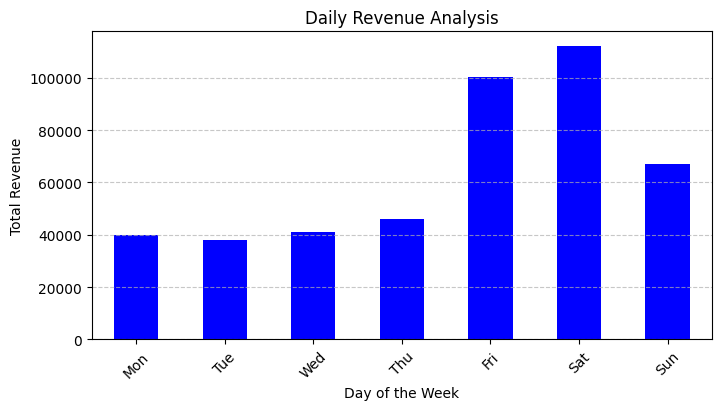

In [ ]:
#5. Аналіз доходу за днями тижня.
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'])
combined_df['day'] = combined_df['datetime'].dt.day_of_week

daily_revenue = combined_df.groupby('day')['item_price'].sum()
print(daily_revenue)

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(8, 4))
daily_revenue.plot(kind='bar', color='blue')
plt.title('Daily Revenue Analysis')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')
plt.xticks(ticks=range(7), labels=days, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()